<a href="https://colab.research.google.com/github/saghar-trade/IBM-Price-prediction/blob/main/IBM_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://stooq.com/q/d/l/?s=ibm.us&i=d"
df = pd.read_csv(url , parse_dates=[0])
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values('Date')
start_date = "2024-01-01"
end_date = "2025-08-07"
df=df[(df['Date']>=start_date) & (df['Date']<= end_date)  ]
print(df)

            Date     Open      High      Low   Close     Volume
15601 2024-01-02  162.830  163.2900  160.460  161.50  3825044.0
15602 2024-01-03  161.000  161.7300  160.080  160.10  4086065.0
15603 2024-01-04  160.220  161.8100  160.170  160.86  3212004.0
15604 2024-01-05  159.910  160.5500  158.670  159.16  4199504.0
15605 2024-01-08  158.690  161.2160  157.885  161.14  3321698.0
...          ...      ...       ...      ...     ...        ...
15997 2025-08-01  251.405  251.4791  245.610  250.05  9683404.0
15998 2025-08-04  251.050  252.0800  248.110  251.98  5280588.0
15999 2025-08-05  252.000  252.8000  248.995  250.67  5823016.0
16000 2025-08-06  251.530  254.3200  249.280  252.28  3692105.0
16001 2025-08-07  252.810  255.0000  248.875  250.16  6251285.0

[401 rows x 6 columns]


In [34]:
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (320, 6)
Test shape: (81, 6)


In [35]:
!pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [38]:
import mplfinance as mpf
df.set_index('Date', inplace=True)

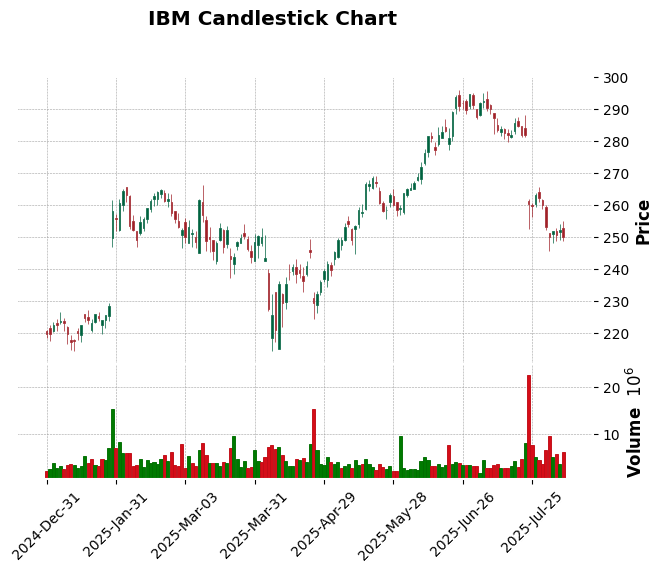

In [40]:
mpf.plot(df.tail(150), type='candle', style='charles', volume=True, title='IBM Candlestick Chart')

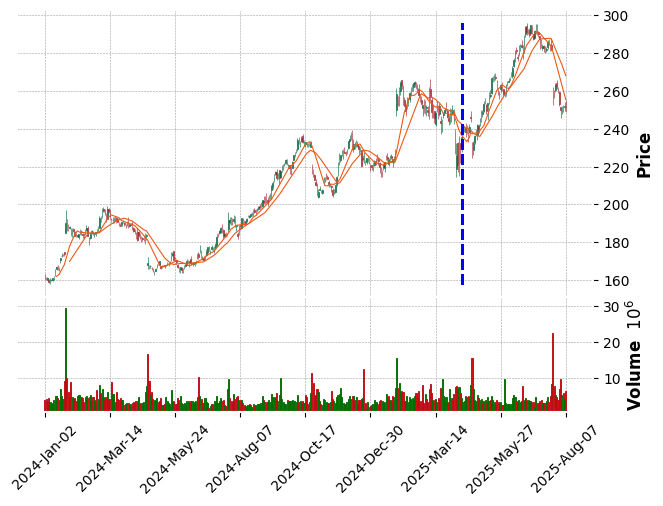

In [52]:
split_date = df.index[train_size]
colors = []
for date in df.index:
    if date <= split_date:
        colors.append('g' if df.loc[date,'Close'] >= df.loc[date,'Open'] else 'r')
    else:
        colors.append('b' if df.loc[date,'Close'] >= df.loc[date,'Open'] else 'orange')
mpf.plot(
    df,
    type='candle',
    style='charles',
    volume=True,
    mav=(10,20),
    alines=dict(alines=[[(split_date, df['Low'].min()), (split_date, df['High'].max())]],
                colors=['blue'],
                linestyle='--')
)

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
sc=MinMaxScaler(feature_range=(0,1))
train_df_scaled=sc.fit_transform(train_df[['Close']])

In [90]:
train_df_scaled

array([[0.02216329],
       [0.0089032 ],
       [0.01610153],
       [0.        ],
       [0.01875355],
       [0.00871377],
       [0.01960599],
       [0.02841447],
       [0.0628907 ],
       [0.07387763],
       [0.06554272],
       [0.07274105],
       [0.11668877],
       [0.12947528],
       [0.13998863],
       [0.13989392],
       [0.29617352],
       [0.26766433],
       [0.26501231],
       [0.2719265 ],
       [0.23205152],
       [0.26273916],
       [0.2522258 ],
       [0.22977837],
       [0.22968365],
       [0.23280924],
       [0.23868157],
       [0.25743512],
       [0.25573025],
       [0.23243038],
       [0.23119909],
       [0.26245501],
       [0.26974806],
       [0.2299678 ],
       [0.19454442],
       [0.23726084],
       [0.2515628 ],
       [0.23650313],
       [0.24351203],
       [0.24758477],
       [0.24502747],
       [0.27505209],
       [0.32108354],
       [0.31057018],
       [0.35044516],
       [0.35404433],
       [0.34845615],
       [0.308

In [67]:
#a data set with 10 timesteps and 1 output
x_train=[]
y_train=[]
for i in range (10, len(train_df_scaled)):
  x_train.append(train_df_scaled[i-10:i, 0])
  y_train.append(train_df_scaled[i, 0])
x_train, y_train=np.array(x_train), np.array(y_train)


In [68]:
x_train.shape

(310, 10)

In [70]:
#reshaping x_train for modeling
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(310, 10, 1)

In [71]:
!pip install keras

In [72]:
!pip install tensorflow

In [73]:
!pip install theano

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668109 sha256=4ffa9756bfbaa9717ef19370062a7b8f09f1b0aaa54a4597e885fa5f762e0c5b
  Stored in directory: /root/.cache/pip/wheels/26/1f/2f/02d738022626461828148150c0354e712c4ad74f1a60f10933
Successfully built theano


In [76]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout

In [78]:
regressor=Sequential()
#LSTM layer with Dropout regularization
regressor.add((LSTM(units=10)))
regressor.add((Dropout(0.2)))
#output layer
regressor.add((Dense(1)))

In [79]:
#compiling LSTM
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [80]:
#fitting train_df
regressor.fit(x_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3038
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2343  
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1898 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1428
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1157 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0783 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0571 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0351 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0336 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0275 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0255 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0286 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0214 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - los

In [85]:
#getting trainig set  ready
inputs = df['Close'][len(df) - len(test_df) - 10:].values.reshape(-1,1)
inputs

array([[244.  ],
       [248.66],
       [250.34],
       [249.98],
       [243.49],
       [227.48],
       [225.78],
       [221.03],
       [235.31],
       [229.55],
       [235.48],
       [239.06],
       [240.7 ],
       [238.57],
       [238.81],
       [236.22],
       [240.9 ],
       [245.48],
       [229.33],
       [232.41],
       [236.16],
       [239.39],
       [241.82],
       [239.66],
       [245.55],
       [249.18],
       [249.12],
       [253.37],
       [254.14],
       [249.2 ],
       [253.69],
       [258.59],
       [257.82],
       [266.68],
       [266.76],
       [268.41],
       [266.95],
       [260.87],
       [258.37],
       [258.63],
       [263.23],
       [260.24],
       [258.69],
       [259.06],
       [263.9 ],
       [265.2 ],
       [265.52],
       [266.86],
       [268.87],
       [272.08],
       [276.24],
       [281.52],
       [281.03],
       [277.22],
       [281.83],
       [283.05],
       [283.21],
       [280.97],
       [289.18

In [86]:
inputs.shape

(91, 1)

In [91]:
inputs=sc.transform(inputs)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [92]:
x_test=[]

for i in range (10, len(inputs)):
  x_test.append(inputs[i-10:i, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [93]:
#predicting x_test and predicting prices
predicted_price=regressor.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [94]:
real_predicted_price=sc.inverse_transform(predicted_price)

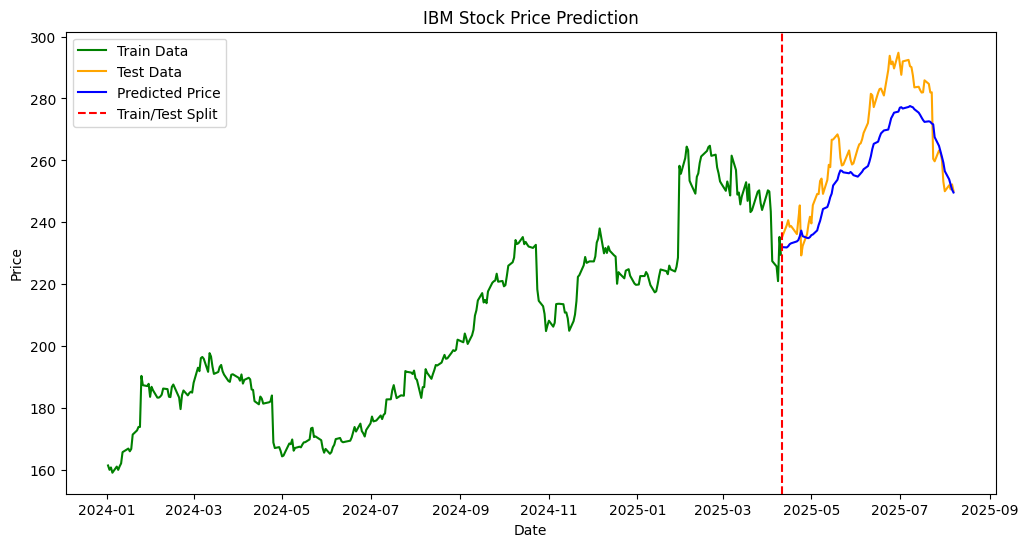

In [95]:
plt.figure(figsize=(12,6))
plt.plot(train_df.index, train_df['Close'], label='Train Data', color='green')
plt.plot(test_df.index, test_df['Close'], label='Test Data', color='orange')
plt.plot(test_df.index, real_predicted_price, label='Predicted Price', color='blue')  # خروجی مدل LSTM
plt.axvline(x=split_date, color='red', linestyle='--', label='Train/Test Split')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

ValueError: O,H,L,C must have the same amount of missing data!

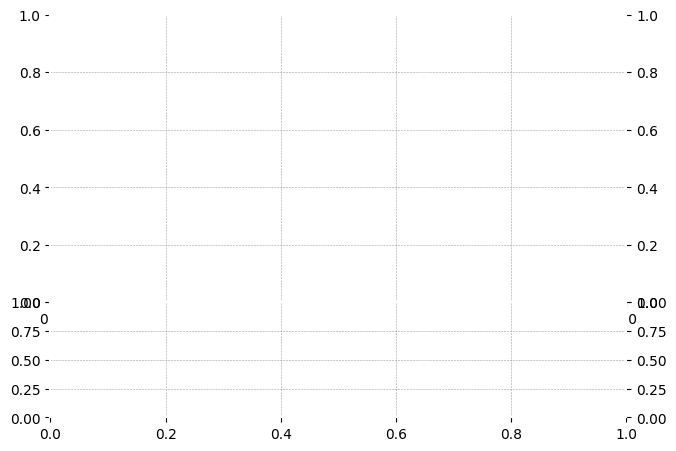

In [101]:
# must unbug---------------
future_days = 40
future_predictions=[]
time_step = 10
n_features = 1


last_sequence = train_df_scaled[-time_step:]

current_seq = last_sequence.reshape(1, time_step, n_features)

for _ in range(future_days):
    pred = regressor.predict(current_seq, verbose=0)
    future_predictions.append(pred[0])
    #for Updating
    current_seq = np.append(current_seq[:, 1:, :], [[pred[0]]], axis=1)

# inversing scaled data
future_predictions_rescaled = sc.inverse_transform(future_predictions)

#predicting
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)
future_df = pd.DataFrame(future_predictions_rescaled, columns=['Close'], index=future_dates)

# combining real data _predicted data
combined_df = pd.concat([df, future_df])

# visualization
split_date = df.index[-1]

ap_future = mpf.make_addplot(
    future_df['Close'], type='line', color='blue', width=1.5
)

mpf.plot(
    combined_df,
    type='candle',
    style='charles',
    addplot=ap_future,
    volume=True,
    alines=dict(alines=[[(split_date, combined_df['Low'].min()), (split_date, combined_df['High'].max())]],
                colors=['black'], linestyle='--'),
    title="Actual vs Future Predictions"
)
